# Week 6-7 한글 리뷰 데이터 전처리_명사_형용사_동사_영어단어 추출 포함버전

In [11]:
# 예시 리뷰
review1="""
업그레이드 후 에어컨 연결이 자주 끊기고,, 에어컨 삭제후 재등록해도 마찬가지이고,, 작년부터 쌓였던 데이터는 다 날라가고,,,사용은 블편하고,, 향편없네요. 앞으로 업그레이드는 층분히 안정화 한다음 시행하세요. 그리고, 고객이 과거버전도 일정기간(가전은 1년정도 더) 그냥 사용하게 해주세요. 효용없는 업그레이드보다는 고객은 안정적 사용을 더 중요하게 생각하는 사람도 많습니다.
"""

In [12]:
# 문장 분리
import kss

review1_split=kss.split_sentences(review1)
review1_split

['업그레이드 후 에어컨 연결이 자주 끊기고,, 에어컨 삭제후 재등록해도 마찬가지이고,, 작년부터 쌓였던 데이터는 다 날라가고,,,사용은 블편하고,, 향편없네요.',
 '앞으로 업그레이드는 층분히 안정화 한다음 시행하세요.',
 '그리고, 고객이 과거버전도 일정기간(가전은 1년정도 더) 그냥 사용하게 해주세요.',
 '효용없는 업그레이드보다는 고객은 안정적 사용을 더 중요하게 생각하는 사람도 많습니다.']

In [15]:
from hanspell import spell_checker
review1_checked=list(map((lambda x:spell_checker.check(x).checked),review1_split))
review1_checked

NameError: name 'review1_split' is not defined

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(r'C:\Users\Administrator\Downloads')
review_df=pd.read_csv("cafe_view_워킹대디_data.csv")
review_df['comment']

0       [['조인님 1강 후기 잘 읽었습니다:) 다음에 만나뵙게되면 저원수환리 설명해주세요...
1       [['극단적인 사례들 좀 충격이었고 최악의 경우 이런일이 일어날수있다니...암담했어...
2                                                      []
3                                                      []
4       [['완벽필사네요..!!👏👏👏👏  회사에서 점심시간에.. 진짜최고!!!'], ['윙...
                              ...                        
1918    [['오징어 알려주실분ㅋㅋ'], ['에깅할줄아시자나요 ㅎㅎ'], ['알고잡는거랑 모...
1919    [['저도요 ..ㅎㅎㅎ..'], ['공감되네요... 지금출근중인데 일어나면 손발저리...
1920    [['이른아침부터 고생하셨습니다 대디님의 행복한 가정과 투자 응원합니다'], ['네...
1921    [['구축도 입지가 좋은곳...보는 눈을 키워야겟네요...도움받아갑니다.'], ['...
1922                                                   []
Name: comment, Length: 1923, dtype: object

In [34]:
def remove_emoji(review):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review)
remove_emoji(review)

NameError: name 'review' is not defined

In [30]:
# 문장 분리
import kss

review_df['comment_n']=review_df['comment'].apply(lambda x: kss.split_sentences(x,num_workers=1))

KeyError: 'EMOJI'

In [10]:
review_df['comment_n']

KeyError: 'comment_n'

In [8]:
# 숫자 제거
import re

def remove_num(sent_list):
    p=re.compile("[0-9]+")
    sent_n_remove=[]
    for sentence in sent_list:
        sent_n_remove.append(p.sub(" ", sentence))
    return(sent_n_remove)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: remove_num(x))

In [9]:
review_df['comment_n']

0        [추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기...
1        [그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다, 앱에서 제품삭제...
2        [퓨리케어 공기청정기  단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가...
3        [에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다., 보기는...
4        [LG엡만.서비스오작동기능들이잘안되고짜증나네., 통신사이동하고삼성단말기로교체해야것네...
                               ...                        
11374                                            [좋아요....]
11375                                             [좋아요~~~]
11376                                             [굿뜨~~~♡]
11377                                                [굿~~]
11378                                           [좋아요👍👍👍👍👍]
Name: comment_n, Length: 11379, dtype: object

In [10]:
# 문장 부호, 특수 문자 제거

def remove_punc(sent_list):
    p=re.compile("\W+")
    sent_n_remove=[]
    for sentence in sent_list:
        sent_n_remove.append(p.sub(" ", sentence))
    return(sent_n_remove)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: remove_punc(x))

In [11]:
review_df['comment_n']

0        [추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기...
1        [그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다, 앱에서 제품삭제...
2        [퓨리케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...
3        [에너지모니터링 지난달 대비 사용량 이전달하고 이번달하고 바꼈다 , 보기는 했는지 ...
4        [LG엡만 서비스오작동기능들이잘안되고짜증나네 , 통신사이동하고삼성단말기로교체해야것네...
                               ...                        
11374                                               [좋아요 ]
11375                                               [좋아요 ]
11376                                                [굿뜨 ]
11377                                                 [굿 ]
11378                                               [좋아요 ]
Name: comment_n, Length: 11379, dtype: object

In [12]:
# 맞춤법 검사 
from hanspell import spell_checker

def spell_checking(sent_list):
    sent_spell=[]
    for sentence in sent_list:
        sent_spell.append(spell_checker.check(sentence).checked)
    return(sent_spell)

In [13]:
# 시간 걸림!
review_df['comment_n_spell']=review_df['comment_n'].apply(lambda x: spell_checking(x))

In [16]:
#기존 맞춤법 검사 결과 읽어오는 경우 사용
review_df=pd.read_csv("thinq_review_result.csv")
review_df['comment_n']=review_df['comment_n_spell'].apply(lambda x: eval(x))
review_df['comment_n']

0        [추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 배...
1        [그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다, 앱에서 제품...
2        [퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가...
3        [에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다, 보기는 했...
4        [LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네, 통신사 이동하고 삼성 단...
                               ...                        
11374                                               [좋아요 ]
11375                                               [좋아요 ]
11376                                                  [굿]
11377                                                 [굿 ]
11378                                               [좋아요 ]
Name: comment_n, Length: 11379, dtype: object

In [17]:
review_df['comment_n_spell']

0        ['추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 ...
1        ['그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다', '앱에서...
2        ['퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시...
3        ['에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다', '보기...
4        ['LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네', '통신사 이동하고 삼...
                               ...                        
11374                                             ['좋아요 ']
11375                                             ['좋아요 ']
11376                                                ['굿']
11377                                               ['굿 ']
11378                                             ['좋아요 ']
Name: comment_n_spell, Length: 11379, dtype: object

In [21]:
review_df['comment_n']=review_df['comment_n_spell']

In [22]:
from konlpy.tag import Okt  
okt=Okt() 
def n_a_v_selection(sent_list): 
    sent_tokens=[]
    for sentence in sent_list:
        pos_result=okt.pos(sentence, stem=True)
        filtered_result=[pair[0] for pair in pos_result if (pair[1]=='Alpha')or(pair[1]=='Noun')or(pair[1]=='Verb')or(pair[1]=='Adjective') or(pair[1]=='Adverb')]
        sent_tokens.append(filtered_result)
    return sent_tokens

In [23]:
review_df['comment_n']=review_df['comment_n'].apply(lambda x: n_a_v_selection(x))

In [24]:
review_df['comment_n']

0        [[], [], [추], [가다], [], [정], [보], [], [등], [록]...
1        [[], [], [그], [냥], [], [엘], [지다], [], [제], [품]...
2        [[], [], [퓨], [리], [], [케], [], [], [공], [기], ...
3        [[], [], [], [너], [지다], [], [모], [니], [터], [링]...
4        [[], [], [L], [G], [], [옙], [만], [], [서다], [비]...
                               ...                        
11374                  [[], [], [좋다], [], [요], [], [], []]
11375                  [[], [], [좋다], [], [요], [], [], []]
11376                                [[], [], [굿], [], []]
11377                            [[], [], [굿], [], [], []]
11378                  [[], [], [좋다], [], [요], [], [], []]
Name: comment_n, Length: 11379, dtype: object

In [ ]:
## 위 코드 실행 시 생략
# 명사만 추출
#from konlpy.tag import Okt  
#okt=Okt()  

#def noun_selection(sent_list):    
#    sent_tokens=[]
#    for sentence in sent_list:
#        sent_tokens.append(okt.nouns(sentence))
#    return(sent_tokens)

#review_df['comment_n']=review_df['comment_n'].apply(lambda x: noun_selection(x))

In [25]:
# 불용어 처리
import json

with open('korean_stopword.json',encoding='utf8') as f:
    stopwords = json.load(f)

stopwords.extend(['안','수','거','왜','것','후','에서','고','이다','는','한','안녕','형','형님','건','안','요','거','피','질','번','용','군','영','스','좀','데','듯','넉','테','런','하다','하나요','되다','안되다','있다','없다'])

In [26]:
def rem_n_stopwords(sent_list):
    sent_stop=[]
    for sentence in sent_list:
        new_sent=[]
        for token in sentence:
            if token not in stopwords:
                new_sent.append(token)
        sent_stop.append(new_sent)
    return(sent_stop)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: rem_n_stopwords(x))

In [27]:
review_df['comment_n']

0        [[], [], [추], [가다], [], [정], [보], [], [], [록],...
1        [[], [], [], [냥], [], [엘], [지다], [], [], [품], ...
2        [[], [], [퓨], [리], [], [케], [], [], [공], [기], ...
3        [[], [], [], [], [지다], [], [], [니], [터], [링], ...
4        [[], [], [L], [G], [], [옙], [만], [], [서다], [비]...
                               ...                        
11374                   [[], [], [좋다], [], [], [], [], []]
11375                   [[], [], [좋다], [], [], [], [], []]
11376                                [[], [], [굿], [], []]
11377                            [[], [], [굿], [], [], []]
11378                   [[], [], [좋다], [], [], [], [], []]
Name: comment_n, Length: 11379, dtype: object

In [28]:
# 빈 리스트 제거
def remove_empty_list(sent_list):
    removed_list = []
    for sentence in sent_list:
        if sentence: # sentence가 빈 경우가 아니면
            removed_list.append(sentence)    
    return removed_list

review_df['comment_n']=review_df['comment_n'].apply(lambda x: remove_empty_list(x))

review_df.to_csv('thinq_review_result.csv',index=False, encoding='utf-8-sig')

In [29]:
review_df['comment_n']

0        [[추], [가다], [정], [보], [록], [은], [앱], [설], [정],...
1        [[냥], [엘], [지다], [품], [은], [리], [컨], [만], [늘다]...
2        [[퓨], [리], [케], [공], [기], [청], [정], [기], [단], ...
3        [[지다], [니], [터], [링], [지다], [난], [달], [대다], [비...
4        [[L], [G], [옙], [만], [서다], [비], [작], [기], [능],...
                               ...                        
11374                                               [[좋다]]
11375                                               [[좋다]]
11376                                                [[굿]]
11377                                                [[굿]]
11378                                               [[좋다]]
Name: comment_n, Length: 11379, dtype: object

In [30]:
# 리뷰 전체를 한 리스트로 만들기
def one_word_list(sent_list):
    one_list=[]
    for sentence in sent_list:
        one_list.extend(sentence)
    return(one_list)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: one_word_list(x))

In [31]:
review_df['comment_n']

0        [추, 가다, 정, 보, 록, 은, 앱, 설, 정, 서다, 충, 분, 히, 음, 도...
1        [냥, 엘, 지다, 품, 은, 리, 컨, 만, 늘다, 정, 신, 강, 좋다, 합, ...
2        [퓨, 리, 케, 공, 기, 청, 정, 기, 단, 짜다, 리, 중, 인, 부, 터,...
3        [지다, 니, 터, 링, 지다, 난, 달, 대다, 비, 량, 전, 달, 달, 바, ...
4        [L, G, 옙, 만, 서다, 비, 작, 기, 능, 들다, 자다, 짜다, 증, 통,...
                               ...                        
11374                                                 [좋다]
11375                                                 [좋다]
11376                                                  [굿]
11377                                                  [굿]
11378                                                 [좋다]
Name: comment_n, Length: 11379, dtype: object

In [32]:
# 단어 빈도 그래프
total_word=[]
for i in range(len(review_df)):
    total_word.extend(review_df.loc[i,'comment_n'])

pd.Series(total_word).value_counts().head(15)


다     7680
늘다    6777
기     6242
니     5179
가다    5145
지다    4684
도     4107
서다    3948
해     3861
좋다    3835
리     2895
시     2794
편     2590
연     2538
결     2488
dtype: int64

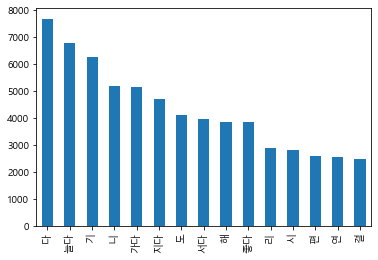

In [33]:
# 단어 빈도 그래프
# 한글 폰트 사용
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

pd.Series(total_word).value_counts().head(15).plot(kind='bar')


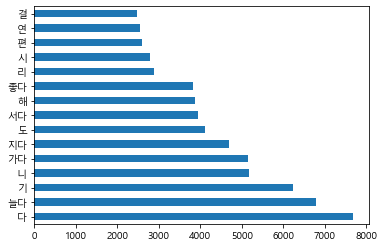

In [34]:
pd.Series(total_word).value_counts().head(15).plot(kind='barh')

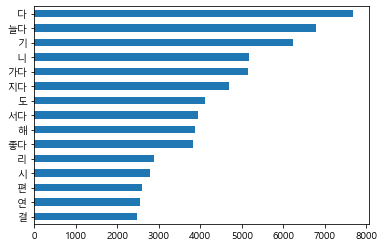

In [35]:
pd.Series(total_word).value_counts().head(15).plot(kind='barh').invert_yaxis()